In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
import sys
# Neil1 - Do i need these?
#sys.path.append('/home/z3526974/Work/code/Shelf_moorings/pssa')
# from mySSA import mySSA
#
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

In [2]:
pwd

'C:\\Users\\Stuart\\Python_Projects_2020\\BMP2020'

In [3]:
datapath = 'data\\'
#ch100 = xr.open_dataset(datapath + 'IMOS_ANMN-NSW_TZ_20090815_CH100_FV02_TEMP-gridded-timeseries_END-20190522_C-20200108.nc')
bmp120gt = xr.open_dataset(datapath + 'IMOS_ANMN-NSW_TZ_20110329_BMP120_FV02_TEMP-gridded-timeseries_END-20200327_C-20200519.nc')
bmp120gt.TEMP


<xarray.DataArray 'TEMP' (TIME: 67626, DEPTH: 12)>
[811512 values with dtype=float32]
Coordinates:
  * TIME       (TIME) datetime64[ns] 2011-03-29T22:00:00 ... 2020-03-27T20:00:00
  * DEPTH      (DEPTH) float32 10.0 20.0 30.0 40.0 ... 90.0 100.0 110.0 120.0
    LATITUDE   float64 ...
    LONGITUDE  float64 ...
Attributes:
    standard_name:  sea_water_temperature
    units:          degrees_Celsius
    cell_methods:   TIME:median DEPTH: point
    valid_min:      -2.5
    long_name:      sea_water_temperature
    valid_max:      40.0

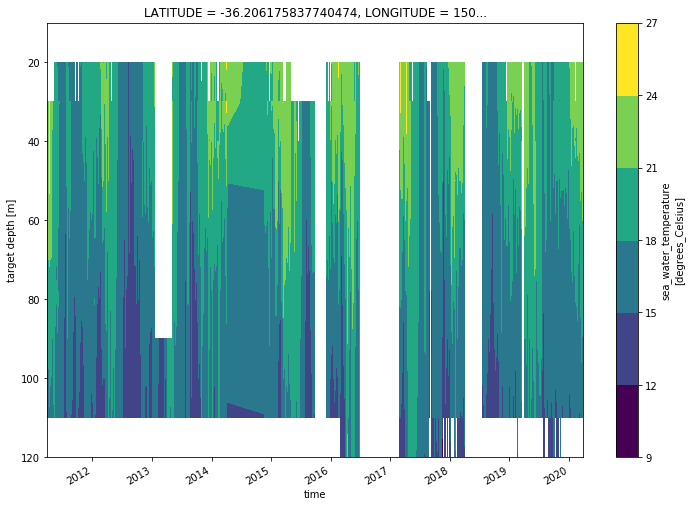

In [4]:
# Plot 1
bmp120gt.TEMP.plot.contourf(x = 'TIME',yincrease=False)
# Neil2 - What plotting package are we using here? matplotlib? And can i change temp colours?

Text(0.5, 1.0, 'BMP120 @20m')

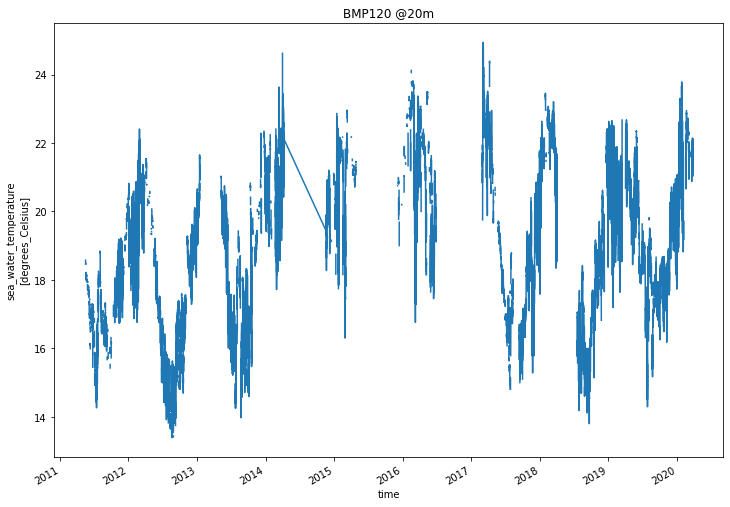

In [11]:
# Plot2
bmp120gt.TEMP.sel(DEPTH=20).plot(x = 'TIME')
plt.title('BMP120 @20m')
# changed depth to 20m

In [35]:
# Neil3 - I want to slice above plot into eg. 1 year but..

# slice not working ['2016','2017']

# should look something like this? df_good['2016':'2017'].DEPTH.plot()
# bmp120gt.TIME.plot()
# bmp120gt['2016':'2017'].DEPTH.plot()
# bmp120gt.TEMP.sel(DEPTH=20).plot(x = 'TIME'['2016':'2017'])
# bmp120gt.TEMP.sel(DEPTH=20).plot['2016':'2017']()
# bmp120gt.TEMP.sel(DEPTH=20)['2016':'2017'].plot(x = 'TIME')

# none working

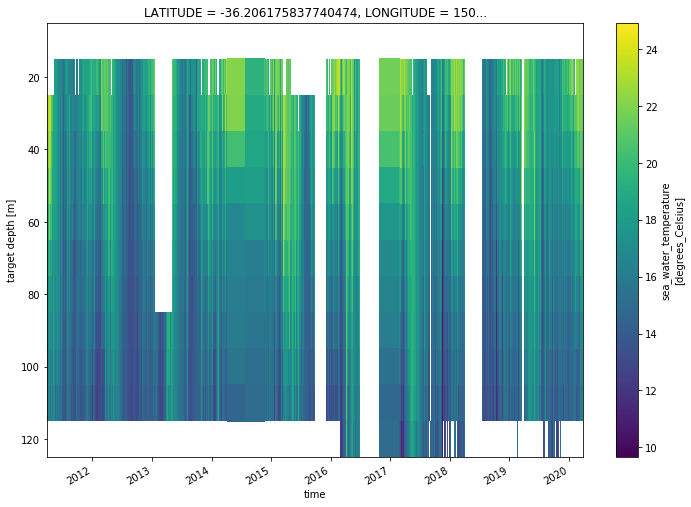

In [39]:
# plot 3 - very similar to plot 1 
bmp120gt.TEMP.plot(x = 'TIME',yincrease=False)

In [ ]:
# I either want to slice Plot 2 in matplotlib (easy?) or display dynamically (hard but nicer solution)..

# Ok now i have gone down a rabbithole trying to use plotly on Plot 2 ie to display in a way that allows zoom/reframing.

# But it might be that plotly has sold out and it doesnt seem to be working , wants me to use graph_objects instead

# strange some of these scripts seem to work sometime??

# im going to create 2 further notebooks to work on simple examples in matplotlib and plotly.

In [ ]:
import plotly
# https://towardsdatascience.com/introduction-to-interactive-time-series-visualizations-with-plotly-in-python-d3219eb7a7af
# Authenticate with your account
plotly.tools.set_credentials_file(username='oneocean',                                              
                                  api_key='••••••••••')

In [ ]:
import chart_studio.plotly as py
import plotly.graph_objs as go

energy_data = go.Scatter(x=bmp120gt.TEMP.sel(DEPTH=20),
                         y=bmp120gt.TIME)

In [ ]:
layout = go.Layout(title='Energy Plot', xaxis=dict(title='Date'),
                   yaxis=dict(title='(kWh)'))

In [ ]:
py.offline.init_notebook_mode(connected=True)
fig = go.Figure(data=[energy_data], layout=layout)
py.iplot(fig, sharing='public')

In [ ]:
bmp120gt.TEMP

In [ ]:
from IPython.display import display


display(bmp120gt)

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Bar(y=[2, 3, 1]))
fig.show()

In [ ]:
import plotly.express as px

df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species", title="A Plotly Express Figure")

# If you print the figure, you'll see that it's just a regular figure with data and layout
# print(fig)

fig.show()

In [ ]:
import plotly.express as px

df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species", title="A Plotly Express Figure")

# If you print the figure, you'll see that it's just a regular figure with data and layout
# print(fig)

fig.show()

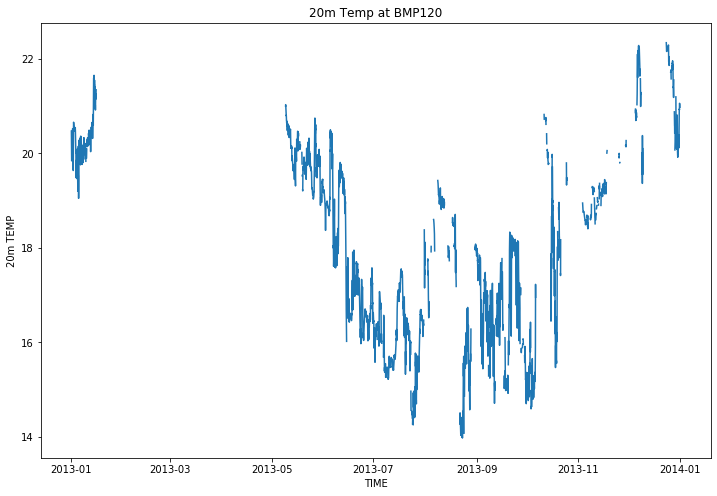

In [102]:
# Using matplotlib Eg1 on Plot 2 - got slice working with .loc

from matplotlib import pyplot as plt

x = bmp120gt.TIME
y = bmp120gt.TEMP.sel(DEPTH=20)
xslice = x.loc['2013':'2013'] # ugly but works
yslice = y.loc['2013':'2013'] 
plt.figure(figsize=(12,8)) # width, height

plt.plot(xslice,yslice)

plt.title('20m Temp at BMP120')
plt.ylabel('20m TEMP')
plt.xlabel('TIME')
ax2.yaxis.set_ticks_position('none') 
plt.show()

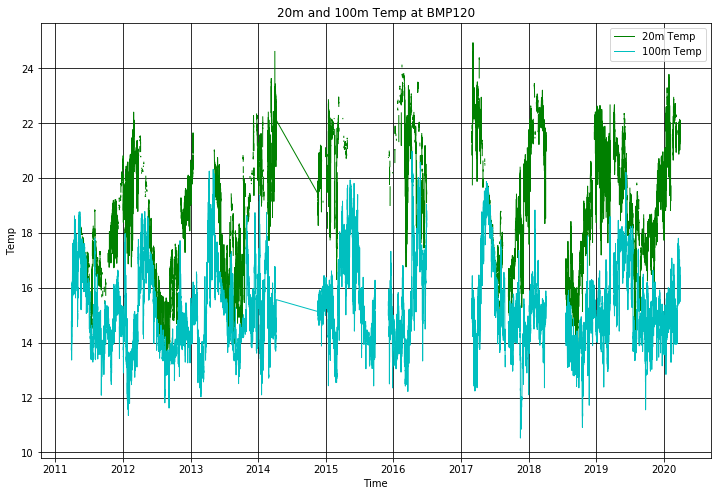

In [123]:
# Using matplotlib Eg2 on Plot 2 - useful - increased figure size/ multiple data

x1 = bmp120gt.TIME
y1 = bmp120gt.TEMP.sel(DEPTH=20)
x2 = bmp120gt.TIME
y2 = bmp120gt.TEMP.sel(DEPTH=100)

plt.figure(figsize=(12,8)) # width, height
plt.plot(x1 ,y1 ,'g',label='20m Temp', linewidth=1)
plt.plot(x2,y2,'c',label='100m Temp',linewidth=1)
plt.title('20m and 100m Temp at BMP120')
plt.ylabel('Temp')
plt.xlabel('Time')
plt.legend()
plt.grid(True,color='k')
plt.show()

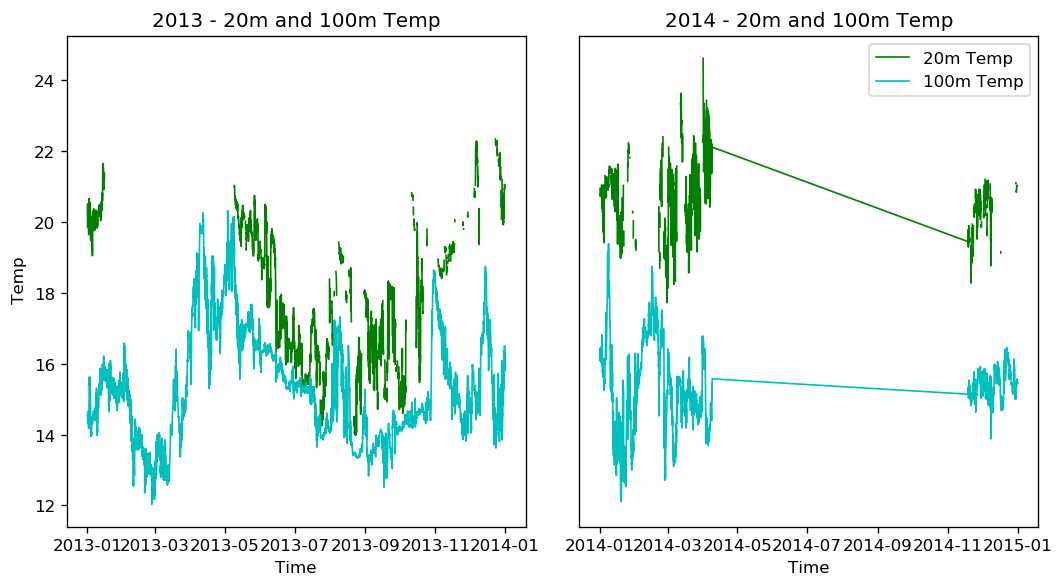

In [124]:
# Using matplotlib Eg3 on Plot 2 - changed scatterplot back to line - 
# Example 3 - with scatterplot/ subplots

import matplotlib.pyplot as plt
%matplotlib inline

# Create Figure and Subplots
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(9,5), sharey=True, dpi=120)

# Plot
#ax1.plot(x1, y1, 'go')  # greendots
ax1.plot(x1.loc['2013':'2013'],y1.loc['2013':'2013'],'g',label='20m Temp', linewidth=1)
ax1.plot(x2.loc['2013':'2013'],y2.loc['2013':'2013'],'c',label='100m Temp', linewidth=1)
# plt.legend() - No handles with labels error ???
#ax2.plot(x2, y2, 'b*')  # bluestars
ax2.plot(x1.loc['2014':'2014'],y1.loc['2014':'2014'],'g',label='20m Temp', linewidth=1)
ax2.plot(x2.loc['2014':'2014'],y2.loc['2014':'2014'],'c',label='100m Temp',linewidth=1)
plt.legend()

# Title, X and Y labels, X and Y Lim
ax1.set_title('2013 - 20m and 100m Temp'); ax2.set_title('2014 - 20m and 100m Temp')
ax1.set_xlabel('Time');  ax2.set_xlabel('Time')  # x label
ax1.set_ylabel(' Temp');  ax2.set_ylabel('')  # y label
#ax1.set_xlim(2011, 2020) ;  ax2.set_xlim(2011, 2020)   # x axis limits
#ax1.set_ylim(0, 12);  ax2.set_ylim(0, 12)  # y axis limits
ax2.yaxis.set_ticks_position('none') 
plt.tight_layout()
plt.show()




In [ ]:
# Some progress here - could make a plot for each year and each depth but would be nicer to get dynamic plotting working
# Lets go back to plotly...